In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Configuración
np.random.seed(42)
plt.style.use('default')
sns.set_palette("husl")

print("=" * 80)
print("ASSIGNMENT UT3-10: PCA y Feature Selection - Ames Housing Dataset")
print("=" * 80)

# ========== FUNCIÓN DE CARGA Y PREPROCESAMIENTO RÁPIDO ==========
def quick_load_and_preprocess_ames(filepath='AmesHousing.csv'):
    """
    Carga y preprocesa Ames Housing en un solo paso
    (Ya hiciste esto en tareas anteriores, aquí es versión simplificada)
    """
    print("\n🏠 CARGANDO Y PREPROCESANDO AMES HOUSING...")

    # Cargar dataset
    df = pd.read_csv(filepath)
    print(f"✅ Dataset cargado: {df.shape[0]:,} casas, {df.shape[1]} columnas")

    # Eliminar 'Id' (no predictivo)
    df = df.drop('Id', axis=1, errors='ignore')

    # Identificar tipos de variables
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Remover target de features
    if 'SalePrice' in numerical_cols:
        numerical_cols.remove('SalePrice')

    print(f"✅ Features numéricas: {len(numerical_cols)}")
    print(f"✅ Features categóricas: {len(categorical_cols)}")

    # Imputar valores faltantes
    num_imputer = SimpleImputer(strategy='median')
    df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

    print(f"✅ Missing values imputados")

    # Label encoding para categóricas
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))

    print(f"✅ Categóricas encoded")

    # Separar X y y
    X = df.drop('SalePrice', axis=1)
    y = df['SalePrice']

    print(f"\n✅ DATASET LISTO:")
    print(f"   X shape: {X.shape} ({X.shape[1]} features)")
    print(f"   y shape: {y.shape}")
    print(f"   Precio promedio: ${y.mean():,.0f}")
    print(f"   Precio mediana: ${y.median():,.0f}")

    return X, y, X.columns.tolist()

# ========== EJECUTAR CARGA RÁPIDA ==========
# TODO: Completa con el path correcto
X, y, feature_names = quick_load_and_preprocess_ames("AmesHousing.csv")

print(f"\n📊 RESUMEN DEL DATASET:")
print(f"   Total features: {X.shape[1]}")
print(f"   Total casas: {X.shape[0]:,}")
print(f"   Ejemplos de features: {feature_names[:10]}")

ASSIGNMENT UT3-10: PCA y Feature Selection - Ames Housing Dataset

🏠 CARGANDO Y PREPROCESANDO AMES HOUSING...
✅ Dataset cargado: 2,930 casas, 82 columnas
✅ Features numéricas: 38
✅ Features categóricas: 43
✅ Missing values imputados
✅ Categóricas encoded

✅ DATASET LISTO:
   X shape: (2930, 81) (81 features)
   y shape: (2930,)
   Precio promedio: $180,796
   Precio mediana: $160,000

📊 RESUMEN DEL DATASET:
   Total features: 81
   Total casas: 2,930
   Ejemplos de features: ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour']


In [3]:
from sklearn.preprocessing import StandardScaler

# ========== ESTANDARIZACIÓN ==========
print("=== ESTANDARIZACIÓN DE FEATURES ===")
print("⚠️ PCA es sensible a escala. SIEMPRE estandarizar antes de PCA.")

# TODO: Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificar estandarización: mean ≈ 0, std ≈ 1
print(f"\n✅ Mean después de scaling: {X_scaled.mean():.6f} (esperado: ~0)")
print(f"✅ Std después de scaling: {X_scaled.std():.6f} (esperado: ~1)")

# Verificar shape
print(f"✅ X_scaled shape: {X_scaled.shape}")

# Comparar antes vs después
print(f"\n=== COMPARACIÓN ANTES vs DESPUÉS ===")
print(f"Antes - Mean GrLivArea: {X['Gr Liv Area'].mean():.0f}, Std: {X['Gr Liv Area'].std():.0f}")
print(f"Después - Mean GrLivArea: {X_scaled[:, X.columns.get_loc('Gr Liv Area')].mean():.6f}, Std: {X_scaled[:, X.columns.get_loc('Gr Liv Area')].std():.6f}")

=== ESTANDARIZACIÓN DE FEATURES ===
⚠️ PCA es sensible a escala. SIEMPRE estandarizar antes de PCA.

✅ Mean después de scaling: -0.000000 (esperado: ~0)
✅ Std después de scaling: 1.000000 (esperado: ~1)
✅ X_scaled shape: (2930, 81)

=== COMPARACIÓN ANTES vs DESPUÉS ===
Antes - Mean GrLivArea: 1500, Std: 506
Después - Mean GrLivArea: 0.000000, Std: 1.000000


In [4]:
from sklearn.decomposition import PCA
import time

# ========== APLICAR PCA SIN RESTRICCIONES ==========
print("\n=== APLICANDO PCA ===")
print("⏱️ Esto puede tomar 10-20 segundos con 80 features...")

start_time = time.time()

# TODO: Aplicar PCA sin restricción de componentes
pca = PCA()  # Sin n_components = todos los componentes posibles
X_pca = pca.fit_transform(X_scaled)

elapsed_time = time.time() - start_time
print(f"✅ PCA completado en {elapsed_time:.2f} segundos")

# ========== ANALIZAR VARIANZA EXPLICADA ==========
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"\n=== ANÁLISIS DE COMPONENTES PRINCIPALES ===")
print(f"Total de componentes generados: {pca.n_components_}")
print(f"\nVarianza explicada por componentes principales:")
print(f"  PC1: {explained_variance[0]:.3%} (¡la más importante!)")
print(f"  PC2: {explained_variance[1]:.3%}")
print(f"  PC3: {explained_variance[2]:.3%}")
print(f"  PC4: {explained_variance[3]:.3%}")
print(f"  PC5: {explained_variance[4]:.3%}")

# TODO: Top 10 componentes
print("\n=== TOP 10 COMPONENTES ===")
for i in range(min(10, len(explained_variance))):
    print(f"PC{i+1:2d}: Individual {explained_variance[i]:6.3%} | Acumulada {cumulative_variance[i]:6.3%}")


=== APLICANDO PCA ===
⏱️ Esto puede tomar 10-20 segundos con 80 features...
✅ PCA completado en 0.00 segundos

=== ANÁLISIS DE COMPONENTES PRINCIPALES ===
Total de componentes generados: 81

Varianza explicada por componentes principales:
  PC1: 13.409% (¡la más importante!)
  PC2: 4.956%
  PC3: 4.709%
  PC4: 3.690%
  PC5: 2.974%

=== TOP 10 COMPONENTES ===
PC 1: Individual 13.409% | Acumulada 13.409%
PC 2: Individual 4.956% | Acumulada 18.365%
PC 3: Individual 4.709% | Acumulada 23.074%
PC 4: Individual 3.690% | Acumulada 26.765%
PC 5: Individual 2.974% | Acumulada 29.739%
PC 6: Individual 2.727% | Acumulada 32.466%
PC 7: Individual 2.550% | Acumulada 35.017%
PC 8: Individual 2.404% | Acumulada 37.420%
PC 9: Individual 2.239% | Acumulada 39.659%
PC10: Individual 2.121% | Acumulada 41.780%



=== SCREE PLOT: VISUALIZACIÓN DE VARIANZA ===


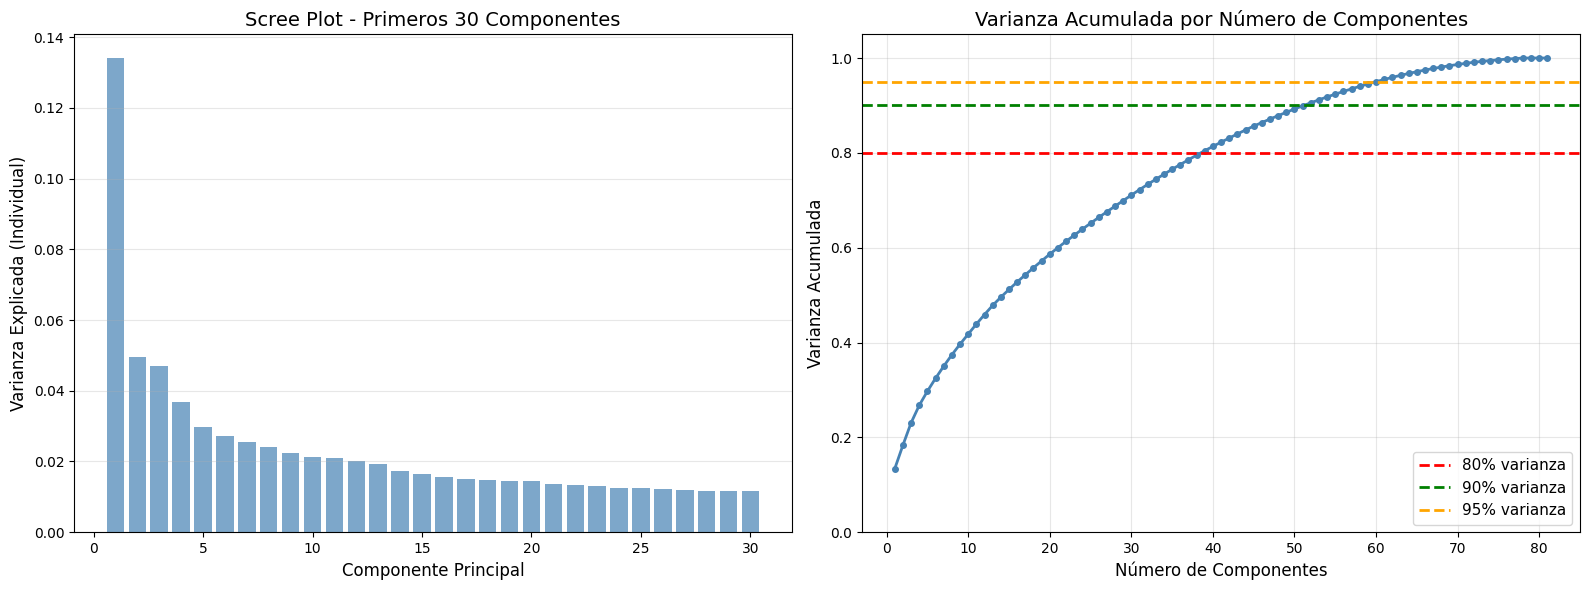


=== DECISIÓN: ¿CUÁNTOS COMPONENTES NECESITAMOS? ===
📊 Para 80% de varianza: 38 componentes
📊 Para 90% de varianza: 51 componentes
📊 Para 95% de varianza: 59 componentes

🎯 IMPACTO DE REDUCCIÓN DIMENSIONAL:
   Original: 81 features
   80% varianza: 81 → 38 (53.1% reducción)
   90% varianza: 81 → 51 (37.0% reducción)
   95% varianza: 81 → 59 (27.2% reducción)

💡 RECOMENDACIÓN PRÁCTICA:
   Para este assignment, usaremos 38 componentes (80% varianza)
   Esto balancea reducción dimensional con retención de información


In [5]:
# ========== CREAR SCREE PLOT ==========
print("\n=== SCREE PLOT: VISUALIZACIÓN DE VARIANZA ===")

# TODO: Crear scree plot con 80 componentes
plt.figure(figsize=(16, 6))

# Subplot 1: Varianza individual (primeros 30 componentes para claridad)
plt.subplot(1, 2, 1)
n_to_show = min(30, len(explained_variance))
plt.bar(range(1, n_to_show + 1), explained_variance[:n_to_show], alpha=0.7, color='steelblue')
plt.xlabel('Componente Principal', fontsize=12)
plt.ylabel('Varianza Explicada (Individual)', fontsize=12)
plt.title(f'Scree Plot - Primeros {n_to_show} Componentes', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Subplot 2: Varianza acumulada (TODOS los componentes)
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'o-', 
         color='steelblue', markersize=4, linewidth=2)

# Líneas de referencia
plt.axhline(y=0.80, color='r', linestyle='--', label='80% varianza', linewidth=2)
plt.axhline(y=0.90, color='g', linestyle='--', label='90% varianza', linewidth=2)
plt.axhline(y=0.95, color='orange', linestyle='--', label='95% varianza', linewidth=2)

plt.xlabel('Número de Componentes', fontsize=12)
plt.ylabel('Varianza Acumulada', fontsize=12)
plt.title('Varianza Acumulada por Número de Componentes', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.ylim([0, 1.05])

plt.tight_layout()
plt.show()

# ========== DECISIÓN DE DIMENSIONALIDAD ==========
print("\n=== DECISIÓN: ¿CUÁNTOS COMPONENTES NECESITAMOS? ===")
# TODO: Calcular componentes necesarios para diferentes umbrales
n_components_80 = np.argmax(cumulative_variance >= 0.80) 
n_components_90 = np.argmax(cumulative_variance >= 0.90)
n_components_95 = np.argmax(cumulative_variance >= 0.95) 

print(f"📊 Para 80% de varianza: {n_components_80} componentes")
print(f"📊 Para 90% de varianza: {n_components_90} componentes")
print(f"📊 Para 95% de varianza: {n_components_95} componentes")

# Análisis de reducción dimensional
original_features = X.shape[1]
reduction_80 = (1 - n_components_80 / original_features) * 100
reduction_90 = (1 - n_components_90 / original_features) * 100
reduction_95 = (1 - n_components_95 / original_features) * 100

print(f"\n🎯 IMPACTO DE REDUCCIÓN DIMENSIONAL:")
print(f"   Original: {original_features} features")
print(f"   80% varianza: {original_features} → {n_components_80} ({reduction_80:.1f}% reducción)")
print(f"   90% varianza: {original_features} → {n_components_90} ({reduction_90:.1f}% reducción)")
print(f"   95% varianza: {original_features} → {n_components_95} ({reduction_95:.1f}% reducción)")

print(f"\n💡 RECOMENDACIÓN PRÁCTICA:")
print(f"   Para este assignment, usaremos {n_components_80} componentes (80% varianza)")
print(f"   Esto balancea reducción dimensional con retención de información")


=== FEATURE SELECTION BASADA EN PCA LOADINGS ===
💡 En lugar de usar PC1, PC2... usaremos las features ORIGINALES
   que tienen mayor loading (peso) en los componentes principales

🔍 Analizando loadings de los primeros 2 componentes...

📊 ESTRATEGIA: Ranking de features por suma de loadings absolutos

🔝 TOP 20 FEATURES POR IMPORTANCIA EN PCA:
   1. Gr Liv Area              : 0.4494
   2. TotRms AbvGrd            : 0.4431
   3. 2nd Flr SF               : 0.4354
   4. BsmtFin SF 1             : 0.3946
   5. Full Bath                : 0.3841
   6. Bsmt Full Bath           : 0.3415
   7. Year Built               : 0.3399
   8. Bedroom AbvGr            : 0.3335
   9. Total Bsmt SF            : 0.3159
  10. BsmtFin Type 1           : 0.3014
  11. Half Bath                : 0.2913
  12. Overall Qual             : 0.2847
  13. Bsmt Unf SF              : 0.2821
  14. 1st Flr SF               : 0.2728
  15. Bsmt Exposure            : 0.2628
  16. Garage Type              : 0.2559
  17. Garage Yr

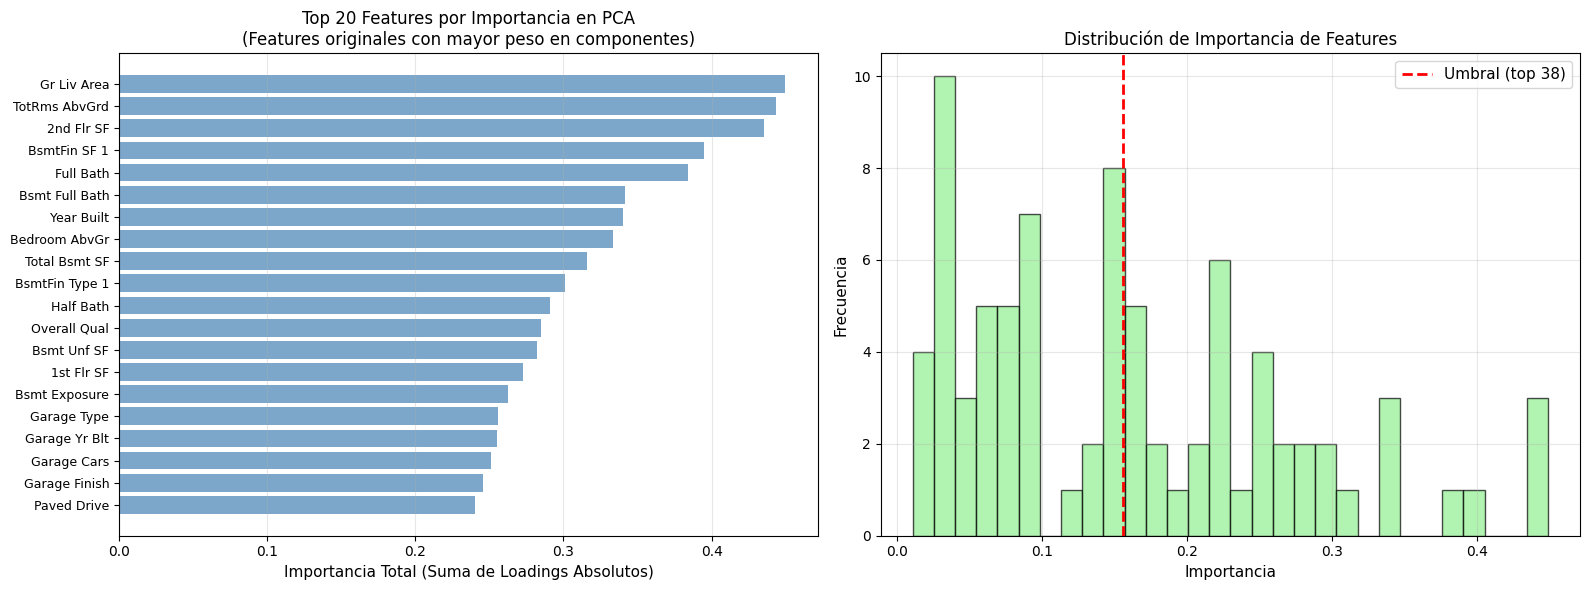


💡 INTERPRETACIÓN:
   Estas features originales son las que 'explican' los componentes principales
   Ventaja: Mantienen interpretabilidad (puedes decir 'GrLivArea importa')
   Diferencia con PCA: Usas features originales, no combinaciones lineales


In [6]:
# ========== FEATURE SELECTION BASADA EN PCA LOADINGS ==========
print("\n=== FEATURE SELECTION BASADA EN PCA LOADINGS ===")
print("💡 En lugar de usar PC1, PC2... usaremos las features ORIGINALES")
print("   que tienen mayor loading (peso) en los componentes principales")

# Decidir cuántos componentes considerar
n_top_components = 2

# Obtener loadings absolutos de todos los componentes importantes
print(f"\n🔍 Analizando loadings de los primeros {n_top_components} componentes...")

# Para cada componente, obtener las features con mayor loading absoluto
all_loadings = pca.components_[:n_top_components, :]  # Primeros n componentes

# Crear DataFrame con loadings de todos los componentes
loadings_all = pd.DataFrame(
    all_loadings.T,
    columns=[f'PC{i+1}' for i in range(n_top_components)],
    index=X.columns
)

# ========== ESTRATEGIA: SUMAR LOADINGS ABSOLUTOS ==========
# Para cada feature, sumar su importancia (loading absoluto) en todos los componentes
print("\n📊 ESTRATEGIA: Ranking de features por suma de loadings absolutos")

# TODO: Calcular importancia total de cada feature
feature_importance_from_pca = loadings_all.abs().sum(axis=1)

# Ordenar por importancia
feature_importance_from_pca = feature_importance_from_pca.sort_values(ascending=False)

print(f"\n🔝 TOP 20 FEATURES POR IMPORTANCIA EN PCA:")
for i, (feature, importance) in enumerate(feature_importance_from_pca.head(20).items(), 1):
    print(f"  {i:2d}. {feature:25s}: {importance:.4f}")

# ========== SELECCIONAR TOP-K FEATURES ==========
k = n_components_80  # Mismo número que usamos con PCA reducido

print(f"\n✅ Seleccionando top {k} features originales basadas en loadings de PCA")

# TODO: Seleccionar features
selected_features_pca = feature_importance_from_pca.head(k).index.tolist()

print(f"\n📋 Features seleccionadas ({k}):")
for i, feat in enumerate(selected_features_pca, 1):
    print(f"  {i:2d}. {feat}")

# ========== PREPARAR DATASET CON FEATURES SELECCIONADAS ==========
X_pca_selected = X_scaled[:, X.columns.isin(selected_features_pca)]

print(f"\n✅ Dataset con features seleccionadas por PCA:")
print(f"   Shape: {X_pca_selected.shape}")
print(f"   Reducción: {X.shape[1]} → {X_pca_selected.shape[1]} features")

# ========== VISUALIZAR COMPARACIÓN ==========
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 20 features por importancia PCA
ax1.barh(range(20), feature_importance_from_pca.head(20).values, color='steelblue', alpha=0.7)
ax1.set_yticks(range(20))
ax1.set_yticklabels(feature_importance_from_pca.head(20).index, fontsize=9)
ax1.set_xlabel('Importancia Total (Suma de Loadings Absolutos)', fontsize=11)
ax1.set_title('Top 20 Features por Importancia en PCA\n(Features originales con mayor peso en componentes)', fontsize=12)
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Distribución de importancias
ax2.hist(feature_importance_from_pca, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
ax2.set_xlabel('Importancia', fontsize=11)
ax2.set_ylabel('Frecuencia', fontsize=11)
ax2.set_title('Distribución de Importancia de Features', fontsize=12)
ax2.axvline(feature_importance_from_pca.iloc[k-1], color='red', linestyle='--', 
            label=f'Umbral (top {k})', linewidth=2)
ax2.legend(fontsize=11)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 INTERPRETACIÓN:")
print("   Estas features originales son las que 'explican' los componentes principales")
print("   Ventaja: Mantienen interpretabilidad (puedes decir 'GrLivArea importa')")
print("   Diferencia con PCA: Usas features originales, no combinaciones lineales")

In [7]:
from sklearn.ensemble import RandomForestRegressor  # ⚠️ REGRESSOR, no Classifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')  # Suprimir warnings de convergencia

# ========== MODELO BASELINE: TODAS LAS FEATURES ORIGINALES ==========
print("\n=== EVALUACIÓN DE PERFORMANCE: PCA vs ORIGINAL ===")
print("⏱️ Esto puede tomar 1-2 minutos (cross-validation con 80 features)...\n")

# TODO: Evaluar modelo con datos originales
print("🔄 Evaluando modelo con features originales...")
rf_original = RandomForestRegressor(
    random_state=42, 
    n_estimators=2000,
    max_depth=None,
    n_jobs=-1             # Usar todos los cores
)

# Usar neg_mean_squared_error y neg_mean_absolute_error para CV
scores_mse_original = -cross_val_score(rf_original, X_scaled, y, cv=5, 
                                        scoring='neg_mean_squared_error', n_jobs=-1)
scores_r2_original = cross_val_score(rf_original, X_scaled, y, cv=5, 
                                     scoring='r2', n_jobs=-1)

rmse_original = np.sqrt(scores_mse_original)

print(f"\n✅ BASELINE - Features Originales ({X.shape[1]} features):")
print(f"   RMSE: ${rmse_original.mean():,.0f} ± ${rmse_original.std():,.0f}")
print(f"   R²:   {scores_r2_original.mean():.4f} ± {scores_r2_original.std():.4f}")
print(f"   Scores RMSE: {[f'${x:,.0f}' for x in rmse_original]}")

# ========== MODELO CON PCA (80% VARIANZA) ==========
print(f"\n🔄 Evaluando modelo con PCA ({n_components_80} componentes)...")

# TODO: Aplicar PCA reducido
pca_reduced = PCA(n_components= n_components_80)
X_pca_reduced = pca_reduced.fit_transform(X_scaled)

print(f"✅ PCA transformado: {X.shape[1]} → {X_pca_reduced.shape[1]} features")

# Evaluar con PCA
rf_pca = RandomForestRegressor(
    random_state=42, 
    n_estimators=100, 
    max_depth=15,
    n_jobs=-1
)

scores_mse_pca = -cross_val_score(rf_pca, X_pca_reduced, y, cv=5, 
                                   scoring='neg_mean_squared_error', n_jobs=-1)
scores_r2_pca = cross_val_score(rf_pca, X_pca_reduced, y, cv=5, 
                                scoring='r2', n_jobs=-1)

rmse_pca = np.sqrt(scores_mse_pca)

print(f"\n✅ PCA - Componentes Reducidos ({n_components_80} componentes):")
print(f"   RMSE: ${rmse_pca.mean():,.0f} ± ${rmse_pca.std():,.0f}")
print(f"   R²:   {scores_r2_pca.mean():.4f} ± {scores_r2_pca.std():.4f}")
print(f"   Scores RMSE: {[f'${x:,.0f}' for x in rmse_pca]}")

# ========== MODELO CON FEATURES SELECCIONADAS POR PCA LOADINGS ==========
print(f"\n🔄 Evaluando modelo con features originales seleccionadas por PCA loadings...")

rf_pca_selected = RandomForestRegressor(
    random_state=42, 
    n_estimators=100, 
    max_depth=15,
    n_jobs=-1
)

scores_mse_pca_selected = -cross_val_score(rf_pca_selected, X_pca_selected, y, cv=5, 
                                             scoring='neg_mean_squared_error', n_jobs=-1)
scores_r2_pca_selected = cross_val_score(rf_pca_selected, X_pca_selected, y, cv=5, 
                                          scoring='r2', n_jobs=-1)

rmse_pca_selected = np.sqrt(scores_mse_pca_selected)

print(f"\n✅ PCA Loadings - Features Originales Seleccionadas ({len(selected_features_pca)} features):")
print(f"   RMSE: ${rmse_pca_selected.mean():,.0f} ± ${rmse_pca_selected.std():,.0f}")
print(f"   R²:   {scores_r2_pca_selected.mean():.4f} ± {scores_r2_pca_selected.std():.4f}")
print(f"   Scores RMSE: {[f'${x:,.0f}' for x in rmse_pca_selected]}")

# ========== ANÁLISIS COMPARATIVO ==========
print(f"\n" + "="*80)
print(f"{'COMPARACIÓN: ORIGINAL vs PCA vs PCA LOADINGS':^80}")
print(f"="*80)

reduction_pct = (1 - n_components_80 / X.shape[1]) * 100
rmse_diff_pca = rmse_pca.mean() - rmse_original.mean()
rmse_diff_pca_selected = rmse_pca_selected.mean() - rmse_original.mean()
r2_diff_pca = scores_r2_pca.mean() - scores_r2_original.mean()
r2_diff_pca_selected = scores_r2_pca_selected.mean() - scores_r2_original.mean()

print(f"\n📊 REDUCCIÓN DIMENSIONAL:")
print(f"   Original: {X.shape[1]} features")
print(f"   PCA: {X.shape[1]} → {n_components_80} componentes ({reduction_pct:.1f}% reducción)")
print(f"   PCA Loadings: {X.shape[1]} → {len(selected_features_pca)} features originales ({reduction_pct:.1f}% reducción)")
print(f"   Varianza retenida (PCA): {pca_reduced.explained_variance_ratio_.sum():.1%}")

print(f"\n📊 PERFORMANCE COMPARATIVO:")
print(f"\n   {'Método':<25s} {'RMSE':>15s} {'R²':>10s} {'Features':>10s}")
print(f"   {'-'*25} {'-'*15} {'-'*10} {'-'*10}")
print(f"   {'Original':<25s} ${rmse_original.mean():>14,.0f} {scores_r2_original.mean():>10.4f} {X.shape[1]:>10d}")
print(f"   {'PCA Componentes':<25s} ${rmse_pca.mean():>14,.0f} {scores_r2_pca.mean():>10.4f} {n_components_80:>10d}")
print(f"   {'PCA Loadings (Originales)':<25s} ${rmse_pca_selected.mean():>14,.0f} {scores_r2_pca_selected.mean():>10.4f} {len(selected_features_pca):>10d}")

print(f"\n📊 DIFERENCIAS VS ORIGINAL:")
print(f"   PCA Componentes:  RMSE {rmse_diff_pca:+,.0f} ({(rmse_diff_pca/rmse_original.mean())*100:+.1f}%) | R² {r2_diff_pca:+.4f}")
print(f"   PCA Loadings:     RMSE {rmse_diff_pca_selected:+,.0f} ({(rmse_diff_pca_selected/rmse_original.mean())*100:+.1f}%) | R² {r2_diff_pca_selected:+.4f}")

# Interpretación
print(f"\n💡 INTERPRETACIÓN:")
print(f"\n   🔵 PCA Componentes (PC1, PC2...):")
if rmse_pca.mean() < rmse_original.mean() * 1.05:
    print(f"      ✅ Mantiene performance similar con {reduction_pct:.0f}% reducción")
    print(f"      ⚠️ Pero: Componentes son combinaciones lineales (menos interpretables)")
else:
    print(f"      ⚠️ Pierde precisión significativa ({(rmse_diff_pca/rmse_original.mean())*100:.1f}%)")

print(f"\n   🟢 PCA Loadings (Features originales):")
if rmse_pca_selected.mean() < rmse_original.mean() * 1.05:
    print(f"      ✅ Mantiene performance similar con {reduction_pct:.0f}% reducción")
    print(f"      ✅ Plus: Usa features originales (interpretables)")
else:
    print(f"      ⚠️ Pierde precisión ({(rmse_diff_pca_selected/rmse_original.mean())*100:.1f}%)")

print(f"\n   💼 PARA NEGOCIO:")
print(f"      - PCA Componentes: Mejor para modelos 'black box' donde solo importa precisión")
print(f"      - PCA Loadings: Mejor para negocio (puedes decir 'GrLivArea es importante')")


=== EVALUACIÓN DE PERFORMANCE: PCA vs ORIGINAL ===
⏱️ Esto puede tomar 1-2 minutos (cross-validation con 80 features)...

🔄 Evaluando modelo con features originales...

✅ BASELINE - Features Originales (81 features):
   RMSE: $26,342 ± $4,353
   R²:   0.8885 ± 0.0311
   Scores RMSE: ['$27,351', '$20,403', '$27,453', '$33,249', '$23,254']

🔄 Evaluando modelo con PCA (38 componentes)...
✅ PCA transformado: 81 → 38 features

✅ PCA - Componentes Reducidos (38 componentes):
   RMSE: $26,620 ± $4,082
   R²:   0.8859 ± 0.0317
   Scores RMSE: ['$25,613', '$22,127', '$27,048', '$34,109', '$24,202']

🔄 Evaluando modelo con features originales seleccionadas por PCA loadings...

✅ PCA Loadings - Features Originales Seleccionadas (38 features):
   RMSE: $27,018 ± $4,050
   R²:   0.8830 ± 0.0295
   Scores RMSE: ['$27,898', '$21,642', '$28,373', '$33,362', '$23,812']

                  COMPARACIÓN: ORIGINAL vs PCA vs PCA LOADINGS                  

📊 REDUCCIÓN DIMENSIONAL:
   Original: 81 features
 


=== FILTER METHOD: F-TEST (ANOVA) ===
F-test mide la relación lineal entre cada feature y el target (SalePrice)

Seleccionando top 38 features con F-test...

✅ Features seleccionadas por F-test (38):
   1. MS Zoning
   2. Lot Area
   3. Street
   4. Lot Shape
   5. Utilities
   6. Condition 2
   7. Overall Qual
   8. Year Built
   9. Year Remod/Add
  10. Mas Vnr Type
  11. Mas Vnr Area
  12. Exter Qual
  13. Foundation
  14. Bsmt Qual
  15. Bsmt Exposure
  16. BsmtFin SF 1
  17. Bsmt Unf SF
  18. Total Bsmt SF
  19. Heating
  20. Heating QC
  21. Central Air
  22. 1st Flr SF
  23. 2nd Flr SF
  24. Gr Liv Area
  25. Full Bath
  26. Half Bath
  27. Kitchen Qual
  28. TotRms AbvGrd
  29. Fireplaces
  30. Garage Yr Blt
  31. Garage Finish
  32. Garage Cars
  33. Garage Area
  34. Paved Drive
  35. Wood Deck SF
  36. Open Porch SF
  37. Misc Feature
  38. Misc Val

=== TOP 15 F-SCORES (Mayor correlación con SalePrice) ===
   1. Overall Qual        : 7
   2. Exter Qual          : 5
   3. Gr

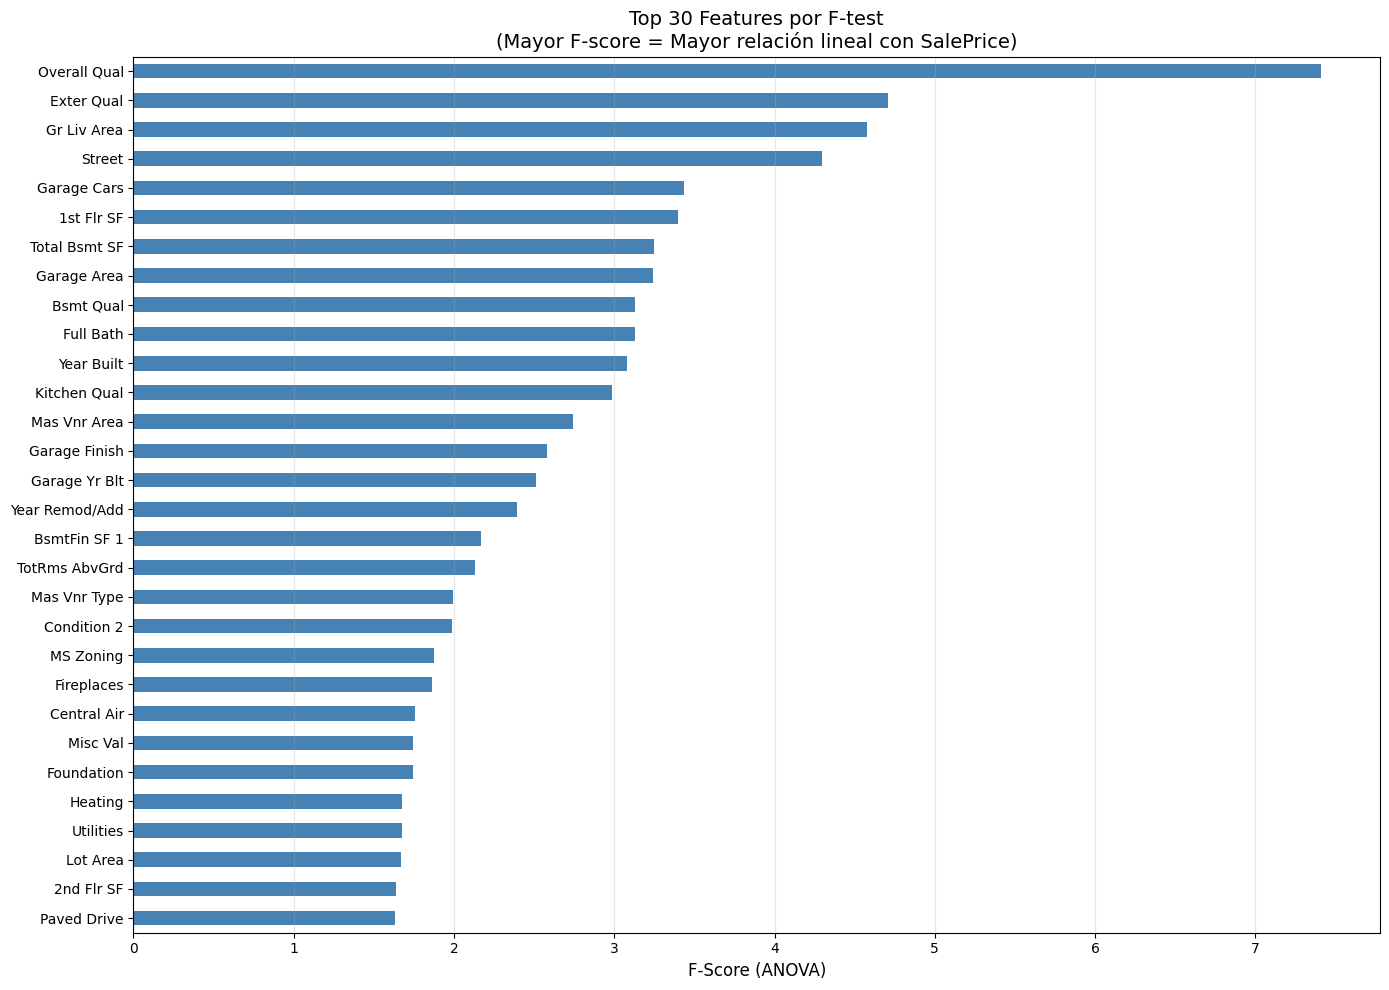

In [8]:
from sklearn.feature_selection import SelectKBest, f_regression  # ⚠️ f_regression, no f_classif

# ========== F-TEST PARA REGRESIÓN ==========
print("\n=== FILTER METHOD: F-TEST (ANOVA) ===")
print("F-test mide la relación lineal entre cada feature y el target (SalePrice)")

# TODO: Seleccionar top-k features por F-test
k = n_components_80  # Mismo número que PCA para comparación justa

print(f"\nSeleccionando top {k} features con F-test...")

selector_f = SelectKBest(k=k)
X_filter_f = selector_f.fit_transform(X_scaled, y)

# Identificar features seleccionadas
selected_features_f = X.columns[selector_f.get_support()]
print(f"\n✅ Features seleccionadas por F-test ({k}):")
for i, feat in enumerate(selected_features_f, 1):
    print(f"  {i:2d}. {feat}")

# ========== SCORES DE F-TEST ==========
scores_f = pd.Series(selector_f.scores_, index=X.columns).sort_values(ascending=False)
print(f"\n=== TOP 15 F-SCORES (Mayor correlación con SalePrice) ===")
for i, (feat, score) in enumerate(scores_f.head(15).items(), 1):
    print(f"  {i:2d}. {feat:20s}: {score:,.0f}")

# TODO: Visualizar scores (top 30 para claridad)
plt.figure(figsize=(14, 10))
scores_f.head(30).sort_values(ascending=True).plot(kind='barh', color='steelblue')
plt.xlabel('F-Score (ANOVA)', fontsize=12)
plt.title('Top 30 Features por F-test\n(Mayor F-score = Mayor relación lineal con SalePrice)', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.feature_selection import SequentialFeatureSelector

# ========== TWO-STAGE SELECTION: PCA + FORWARD ==========
print("\n=== WRAPPER METHOD: FORWARD SELECTION ===")
print("💡 ESTRATEGIA: Forward Selection sobre features pre-seleccionadas por PCA")
print(f"   Stage 1 (ya hecho): PCA Loadings → {len(selected_features_pca)} features")
print(f"   Stage 2 (ahora): Forward Selection → refinar a menos features")
print("⏱️ Esto tomará ~30-60 segundos (mucho más rápido que sobre 79 features)...\n")

# Decidir cuántas features seleccionar con wrapper
k_wrapper = max(15, k // 2)  # Aproximadamente la mitad de las features PCA, o mínimo 15
print(f"🎯 Target: Seleccionar {k_wrapper} features con Forward Selection")

# TODO: Forward Selection sobre features pre-seleccionadas
estimator_forward = RandomForestRegressor(
    random_state=42, 
    n_estimators= 20,
    max_depth=None,
    n_jobs=-1
)

selector_forward = SequentialFeatureSelector(
    estimator=estimator_forward, 
    n_features_to_select=k_wrapper,
    direction= 'forward',
    cv=3,              # 3 folds para rapidez
    n_jobs=-1
)

print(f"🔄 Ejecutando Forward Selection sobre {len(selected_features_pca)} features pre-seleccionadas...")
import time
start_time = time.time()
X_forward = selector_forward.fit_transform(X_pca_selected, y)
elapsed_time = time.time() - start_time

print(f"✅ Forward Selection completado en {elapsed_time:.1f} segundos")

# Features seleccionadas (mapear índices de vuelta a nombres)
selected_indices_forward = selector_forward.get_support()
selected_features_forward = [selected_features_pca[i] for i, sel in enumerate(selected_indices_forward) if sel]

print(f"\n✅ Features seleccionadas por Forward Selection ({len(selected_features_forward)}):")
for i, feat in enumerate(selected_features_forward, 1):
    print(f"  {i:2d}. {feat}")


=== WRAPPER METHOD: FORWARD SELECTION ===
💡 ESTRATEGIA: Forward Selection sobre features pre-seleccionadas por PCA
   Stage 1 (ya hecho): PCA Loadings → 38 features
   Stage 2 (ahora): Forward Selection → refinar a menos features
⏱️ Esto tomará ~30-60 segundos (mucho más rápido que sobre 79 features)...

🎯 Target: Seleccionar 19 features con Forward Selection
🔄 Ejecutando Forward Selection sobre 38 features pre-seleccionadas...
✅ Forward Selection completado en 55.2 segundos

✅ Features seleccionadas por Forward Selection (19):
   1. TotRms AbvGrd
   2. 2nd Flr SF
   3. BsmtFin SF 1
   4. Full Bath
   5. BsmtFin Type 1
   6. Half Bath
   7. Overall Qual
   8. Bsmt Exposure
   9. Garage Yr Blt
  10. Paved Drive
  11. Bsmt Qual
  12. Exter Qual
  13. Kitchen Qual
  14. Garage Area
  15. Heating QC
  16. Central Air
  17. Electrical
  18. Wood Deck SF
  19. BsmtFin Type 2


In [ ]:
from sklearn.feature_selection import RFE

# ========== TWO-STAGE SELECTION: PCA + RFE ==========
print("\n=== WRAPPER METHOD: RFE (Recursive Feature Elimination) ===")
print("💡 ESTRATEGIA: RFE sobre features pre-seleccionadas por PCA")
print(f"   Stage 1 (ya hecho): PCA Loadings → {len(selected_features_pca)} features")
print(f"   Stage 2 (ahora): RFE → refinar a {k_wrapper} features")
print("⏱️ Esto tomará ~45-90 segundos...\n")

# TODO: RFE con Random Forest Regressor sobre features pre-seleccionadas
estimator = RandomForestRegressor(
    random_state=42, 
    n_estimators=______,
    max_depth=______,
    n_jobs=-1
)
selector_rfe = RFE(estimator=estimator, n_features_to_select=k_wrapper, step=______)

print(f"🔄 Ejecutando RFE sobre {len(selected_features_pca)} features...")
import time
start_time = time.time()
X_rfe = selector_rfe.fit_transform(X_pca_selected, y)
elapsed_time = time.time() - start_time

print(f"✅ RFE completado en {elapsed_time:.1f} segundos")

# Features seleccionadas (mapear índices de vuelta a nombres)
selected_indices_rfe = selector_rfe.get_support()
selected_features_rfe = [selected_features_pca[i] for i, sel in enumerate(selected_indices_rfe) if sel]

print(f"\n✅ Features seleccionadas por RFE ({len(selected_features_rfe)}):")
for i, feat in enumerate(selected_features_rfe, 1):
    print(f"  {i:2d}. {feat}")

# Ranking de features (solo sobre las pre-seleccionadas por PCA)
ranking = pd.Series(selector_rfe.ranking_, index=selected_features_pca).sort_values()
print(f"\nRanking de features (1 = seleccionada, solo mostrando top 20):")
print(ranking.head(20))

# Visualizar ranking (top 30 para claridad)
plt.figure(figsize=(12, 8))
ranking.head(30).sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Ranking (1 = mejor, números mayores = eliminadas antes)')
plt.title(f'RFE Feature Ranking - Top 30 de {len(selected_features_pca)} features pre-seleccionadas')
plt.tight_layout()
plt.show()

In [ ]:
# Comparar features seleccionadas por diferentes métodos
print("\n=== COMPARACIÓN DE FEATURES SELECCIONADAS ===")

# Crear conjunto de features por método
features_dict = {
    'F-test': set(selected_features_f),
    'Mutual Info': set(selected_features_mi),
    'Forward': set(selected_features_forward),
    'Backward': set(selected_features_backward),
    'RFE': set(selected_features_rfe)
}

# Features en al menos 2 métodos
all_features = set()
for features in features_dict.values():
    all_features.update(features)

feature_counts = {}
for feature in all_features:
    count = sum(1 for features in features_dict.values() if feature in features)
    feature_counts[feature] = count

# Features consistentes (en todos los métodos)
consistent_features = [f for f, count in feature_counts.items() if count == 3]
print(f"\nFeatures consistentes (en todos los métodos): {len(consistent_features)}")
print(consistent_features)

# Features en al menos 2 métodos
robust_features = [f for f, count in feature_counts.items() if count >= 2]
print(f"\nFeatures robustas (≥2 métodos): {len(robust_features)}")
print(robust_features)

print("\n💡 OBSERVACIÓN:")
print(f"   Forward, Backward y RFE son todos wrapper methods, pero usan estrategias diferentes")

In [ ]:
# ========== EVALUACIÓN: FORWARD SELECTION ==========
print("\n=== EVALUANDO WRAPPER METHODS ===")
print("⏱️ Cross-validation con features de cada método...\n")

print("🔄 Evaluando Forward Selection...")
rf_forward = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15, n_jobs=-1)

scores_mse_forward = -cross_val_score(rf_forward, X_forward, y, cv=5, 
                                       scoring='neg_mean_squared_error', n_jobs=-1)
scores_r2_forward = cross_val_score(rf_forward, X_forward, y, cv=5, 
                                    scoring='r2', n_jobs=-1)
rmse_forward = np.sqrt(scores_mse_forward)

print(f"✅ Forward Selection ({len(selected_features_forward)} features):")
print(f"   RMSE: ${rmse_forward.mean():,.0f} ± ${rmse_forward.std():,.0f}")
print(f"   R²:   {scores_r2_forward.mean():.4f} ± {scores_r2_forward.std():.4f}")

# ========== EVALUACIÓN: BACKWARD ELIMINATION ==========
print(f"\n🔄 Evaluando Backward Elimination...")
rf_backward = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15, n_jobs=-1)

scores_mse_backward = -cross_val_score(rf_backward, X_backward, y, cv=5, 
                                         scoring='neg_mean_squared_error', n_jobs=-1)
scores_r2_backward = cross_val_score(rf_backward, X_backward, y, cv=5, 
                                      scoring='r2', n_jobs=-1)
rmse_backward = np.sqrt(scores_mse_backward)

print(f"✅ Backward Elimination ({len(selected_features_backward)} features):")
print(f"   RMSE: ${rmse_backward.mean():,.0f} ± ${rmse_backward.std():,.0f}")
print(f"   R²:   {scores_r2_backward.mean():.4f} ± {scores_r2_backward.std():.4f}")

# ========== EVALUACIÓN: RFE ==========
print(f"\n🔄 Evaluando RFE...")
rf_rfe = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15, n_jobs=-1)

scores_mse_rfe = -cross_val_score(rf_rfe, X_rfe, y, cv=5, 
                                   scoring='neg_mean_squared_error', n_jobs=-1)
scores_r2_rfe = cross_val_score(rf_rfe, X_rfe, y, cv=5, 
                                scoring='r2', n_jobs=-1)
rmse_rfe = np.sqrt(scores_mse_rfe)

print(f"✅ RFE ({len(selected_features_rfe)} features):")
print(f"   RMSE: ${rmse_rfe.mean():,.0f} ± ${rmse_rfe.std():,.0f}")
print(f"   R²:   {scores_r2_rfe.mean():.4f} ± {scores_r2_rfe.std():.4f}")

# ========== COMPARACIÓN ACTUALIZADA ==========
print(f"\n" + "="*80)
print(f"{'COMPARACIÓN: TODOS LOS MÉTODOS HASTA AHORA':^80}")
print(f"="*80)

comparison_updated = {
    'Método': ['Original', 'PCA Componentes', 'PCA Loadings', 'F-test', 'MI', 'Forward', 'Backward', 'RFE'],
    'N_Features': [X.shape[1], n_components_80, k, k, k, k, k, k],
    'RMSE': [rmse_original.mean(), rmse_pca.mean(), rmse_pca_selected.mean(), rmse_filter_f.mean(), 
             rmse_filter_mi.mean(), rmse_forward.mean(), rmse_backward.mean(), rmse_rfe.mean()],
    'R²': [scores_r2_original.mean(), scores_r2_pca.mean(), scores_r2_pca_selected.mean(), scores_r2_filter_f.mean(), 
           scores_r2_filter_mi.mean(), scores_r2_forward.mean(), scores_r2_backward.mean(), scores_r2_rfe.mean()]
}
comparison_updated_df = pd.DataFrame(comparison_updated)
comparison_updated_df['Reducción%'] = (1 - comparison_updated_df['N_Features'] / X.shape[1]) * 100
comparison_updated_df = comparison_updated_df.sort_values('RMSE')

print(f"\n{comparison_updated_df.to_string(index=False)}")

print(f"\n💡 OBSERVACIÓN:")
best_method = comparison_updated_df.iloc[0]['Método']
best_rmse = comparison_updated_df.iloc[0]['RMSE']
print(f"   🏆 Mejor RMSE: {best_method} (${best_rmse:,.0f})")

In [ ]:
# TODO: Entrenar Random Forest y obtener importances
print("\n=== EMBEDDED METHODS: Random Forest ===")
from sklearn.ensemble import RandomForestClassifier

rf_embedded = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
rf_embedded.fit(X_scaled, y)

# Feature importances
importances = pd.Series(rf_embedded.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 features por importancia:")
print(importances.head(10))

# Visualizar importances
plt.figure(figsize=(12, 8))
importances.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

# TODO: Seleccionar top-k features
top_k_features = importances.nlargest(k).index
X_rf_importance = X_scaled[:, X.columns.isin(top_k_features)]

print(f"\nFeatures seleccionadas por RF Importance ({k}):")
print(list(top_k_features))

# Evaluar
rmse_rf_importance = np.sqrt(-cross_val_score(rf_embedded, X_rf_importance, y, cv=5, scoring='neg_mean_squared_error'))
print(f"\nRMSE RF Importance ({k} features): ${rmse_rf_importance.mean():,.0f} ± ${rmse_rf_importance.std():,.0f}")
scores_rf_importance = cross_val_score(rf_embedded, X_rf_importance, y, cv=5, scoring='accuracy')
print(f"\nRF Importance ({k} features):")
print(f"  Mean: {scores_rf_importance.mean():.3f}")
print(f"  Std: {scores_rf_importance.std():.3f}")

In [ ]:
from sklearn.linear_model import LassoCV

# ========== LASSO PARA FEATURE SELECTION ==========
print("\n=== EMBEDDED METHOD: Lasso (L1 Regularization) ===")
print("Lasso penaliza coeficientes, forzando a 0 features no importantes")
print("⏱️ Esto puede tomar 30-60 segundos...\n")

# TODO: Lasso para regresión
lasso = LassoCV(cv=5, random_state=42, max_iter=______)
lasso.fit(X_scaled, y)

print(f"✅ Lasso alpha seleccionado: {lasso.alpha_:.4f}")

# Features seleccionadas (coef != 0)
lasso_nonzero = X.columns[lasso.coef_ != 0]
print(f"\n📊 Features con coeficiente no-cero: {len(lasso_nonzero)} de {X.shape[1]}")

# Seleccionar top-k por magnitud de coeficiente
coef_abs = pd.Series(np.abs(lasso.coef_), index=X.columns).sort_values(ascending=False)
lasso_features = coef_abs.nlargest(k).index

print(f"\n✅ Top {k} features por magnitud de coeficiente Lasso:")
for i, (feat, coef) in enumerate(coef_abs.nlargest(k).items(), 1):
    print(f"  {i:2d}. {feat:20s}: |{coef:.6f}|")

# TODO: Visualizar coeficientes (top 30)
plt.figure(figsize=(14, 10))
coef_abs.head(30).sort_values(ascending=True).plot(kind='barh', color='purple')
plt.xlabel('|Coeficiente Lasso|', fontsize=12)
plt.title('Top 30 Features por Magnitud de Coeficiente Lasso\n(Mayor magnitud = Mayor importancia)', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Preparar features para evaluación
X_lasso = X_scaled[:, X.columns.isin(lasso_features)]

# ========== EVALUAR CON RANDOM FOREST ==========
print(f"\n🔄 Evaluando Lasso selection...")
rf_lasso = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15, n_jobs=-1)

scores_mse_lasso = -cross_val_score(rf_lasso, X_lasso, y, cv=5, 
                                     scoring='neg_mean_squared_error', n_jobs=-1)
scores_r2_lasso = cross_val_score(rf_lasso, X_lasso, y, cv=5, 
                                  scoring='r2', n_jobs=-1)
rmse_lasso = np.sqrt(scores_mse_lasso)

print(f"✅ Lasso selection ({k} features):")
print(f"   RMSE: ${rmse_lasso.mean():,.0f} ± ${rmse_lasso.std():,.0f}")
print(f"   R²:   {scores_r2_lasso.mean():.4f} ± {scores_r2_lasso.std():.4f}")

🤔 Pregunta Reflexiva (Lasso):

¿Lasso forzó muchas features a 0? ¿Qué te dice esto sobre la redundancia de features?
¿Las features que Lasso considera importantes coinciden con los otros métodos?
¿Lasso es más útil para interpretabilidad o para performance?
🤔 Pregunta Reflexiva 12 (Final de Parte 6):

¿Qué método dio mejor RMSE? ¿Es el que recomendarías para producción? ¿Por qué sí o no?
¿Por qué Feature Selection es preferible a PCA en el contexto de bienes raíces?
Si tuvieras que presentar estos resultados al CEO de la empresa inmobiliaria (no técnico), ¿qué 3 puntos clave destacarías?
¿Cómo comunicarías el trade-off entre reducir features (velocidad) y mantener precisión (RMSE)?
¿El método ganador es interpretable? ¿Por qué esto es crítico para esta industria?
